In [2]:
import scipy.integrate
import pints
import pints.plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pints.toy

np.random.seed(123)

In [3]:
def load_wolf_moose_data(file_location):
    """Load the Wolves & Moose of Isle Royale data from csv file.
    
    Parameters
    ----------
    file_location : str
        path to the csv file containing the wolf-moose population numbers. The file should contain 
        the year in the first column, no. of moose in the second column, and the no. of wolves in the third column.

    Returns
    -------
    pandas.DataFrame
        Wolves & Moose of Isle Royale
    """
    names = ["year", "wolf", "moose"]
    df = pd.read_csv(file_location, header=None, names=names)
    return df

df = load_wolf_moose_data("wolf_moose_data.csv")
times = df['year'].values
observed_data = df[['wolf', 'moose']].values
init_wolves, init_moose = df['wolf'].iloc[0], df['moose'].iloc[0]

# class LotkaVolterraModel(pints.ForwardModel):

#     def __init__(self, method="RK45", rtol=1e-6, atol=1e-6):
#         """
#         Parameters
#         ----------
#         method : str or scipy solver
#             Solver method for solving ODE
#         rtol : float
#             Relative tolerance of ODE solution (applies to adaptive solvers)
#         atol : float
#             Absolute tolerance of ODE solution (applies to adaptive solvers)
#         """
#         super().__init__()
#         self.method = method
#         self.rtol = rtol
#         self.atol = atol

#     def n_parameters(self):
#         return 4

#     def simulate(self, parameters, times):
#         a, b, c, d = parameters

#         def dy(t, state):
#             x, y = state
#             dx= a * x - b * x * y 
#             dy = -c * y + d * x * y
            
#             return (dx, dy)

#         initial_condition = np.asarray([np.log(init_moose), np.log(init_wolves)])

#         res = scipy.integrate.solve_ivp(
#             dy,
#             (times[0], times[-1]),
#             initial_condition,
#             t_eval=times)
        
#         return res.y.T

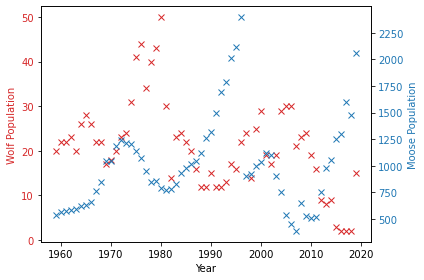

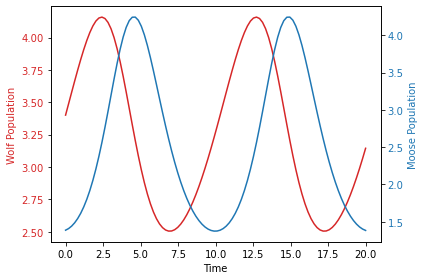

In [4]:
#import pints.toy
#m = pints.toy.LotkaVolterraModel()

# Plot wolf and moose populations
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Wolf Population', color='tab:red')
ax1.plot(df['year'], df['wolf'], 'x', color='tab:red', label='Wolves')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Moose Population', color='tab:blue')
ax2.plot(df['year'], df['moose'], 'x', color='tab:blue', label='Moose')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()

# Make a model object and run a simulation at arbitrary parameter values
m = pints.toy.LotkaVolterraModel()
times1 = np.linspace(0, 20, 100)
params = [0.28, 0.11, 1.37, 0.42]
#init_wolves, init_moose = 5, 30
#df['wolf'].iloc[0], df['moose'].iloc[0]
y = m.simulate(params, times1)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time')
ax1.set_ylabel('Wolf Population', color='tab:red')
ax1.plot(times1, y[:, 0], color='tab:red', label='Wolves')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Moose Population', color='tab:blue')
ax2.plot(times1, y[:, 1], color='tab:blue', label='Moose')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.show()

In [22]:
print(observed_data)
print(times)

[[  20  538]
 [  22  564]
 [  22  572]
 [  23  579]
 [  20  596]
 [  26  620]
 [  28  634]
 [  26  661]
 [  22  766]
 [  22  848]
 [  17 1041]
 [  18 1045]
 [  20 1183]
 [  23 1243]
 [  24 1215]
 [  31 1203]
 [  41 1139]
 [  44 1070]
 [  34  949]
 [  40  845]
 [  43  857]
 [  50  788]
 [  30  767]
 [  14  780]
 [  23  830]
 [  24  927]
 [  22  976]
 [  20 1014]
 [  16 1046]
 [  12 1116]
 [  12 1260]
 [  15 1315]
 [  12 1496]
 [  12 1697]
 [  13 1784]
 [  17 2017]
 [  16 2117]
 [  22 2398]
 [  24  900]
 [  14  925]
 [  25  997]
 [  29 1031]
 [  19 1120]
 [  17 1100]
 [  19  900]
 [  29  750]
 [  30  540]
 [  30  450]
 [  21  385]
 [  23  650]
 [  24  530]
 [  19  510]
 [  16  515]
 [   9  750]
 [   8  975]
 [   9 1050]
 [   3 1250]
 [   2 1300]
 [   2 1600]
 [   2 1475]
 [  15 2060]]
[1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 199

In [5]:
# Step 5: Set up the problem
problem = pints.MultiOutputProblem(m , times, np.log(observed_data))
error = pints.SumOfSquaresError(problem)

# Step 6: Create the log-posterior
log_prior_theta = pints.UniformLogPrior(lower_or_boundaries=0, upper=10)
log_prior_sigma = pints.GaussianLogPrior(mean=0, sd=3)
log_prior = pints.ComposedLogPrior(log_prior_theta, log_prior_theta, log_prior_theta, log_prior_theta,
                                   log_prior_sigma, log_prior_sigma)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

transformation = pints.RectangularBoundariesTransformation(
    [0.01, 0.01, 0.01, 0.01],
    [10.0, 10.0, 10, 10.0])

opt = pints.OptimisationController(
    error,
    [0.5, 0.02, 0.1, 0.5],
    method=pints.CMAES,
    transformation=transformation
)

opt.set_log_interval(200)
found_parameters, found_value = opt.run()

print("Fit parameters:", found_parameters)

Minimising error measure
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 8
Iter. Eval. Best      Current   Time m:s
0     8      3358.679  3358.679   0:00.1
1     16     3358.679  3396.324   0:00.1
2     24     3358.679  3382.707   0:00.1
3     32     3357.742  3357.742   0:00.2


/Users/sajai/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


200   1608   1081.052  1081.052   0:03.7
400   3208   1081.052  1081.052   0:07.5
416   3328   1081.052  1081.052   0:07.8
Halting: No significant change for 200 iterations.
Fit parameters: [0.01       0.01       0.01255769 0.01      ]


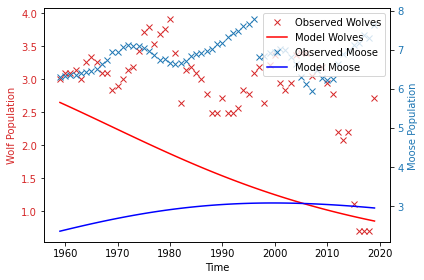

In [9]:
# Evaluate the model with the found paramet and plot the results
fig, ax1 = plt.subplots()

# Plot observed wolf population
ax1.set_xlabel('Time')
ax1.set_ylabel('Wolf Population', color='tab:red')
ax1.plot(times, np.log(observed_data)[:, 0], 'x', label='Observed Wolves', color='tab:red')
ax1.plot(times, problem.evaluate(found_parameters)[:, 0], label='Model Wolves', color='red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot observed moose population
ax2 = ax1.twinx()
ax2.set_ylabel('Moose Population', color='tab:blue')
ax2.plot(times, np.log(observed_data)[:, 1], 'x', label='Observed Moose', color='tab:blue')
ax2.plot(times, problem.evaluate(found_parameters)[:, 1], label='Model Moose', color='blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [ ]:
import pints.residuals_diagnostics

pints.residuals_diagnostics.plot_residuals_autocorrelation(np.asarray([found_parameters]), problem)
plt.show()

pints.residuals_diagnostics.plot_residuals_vs_output(np.asarray([found_parameters]), problem)
plt.show()

In [ ]:
plt.plot(times, y, 'x', label='Data')
plt.plot(times, problem.evaluate(found_parameters[:-2]), label='Model fit', color='k')
plt.legend()
plt.show()
